In [1]:
import matplotlib.pyplot as plt

### Project Brief

You have been hired by Inn the Neighborhood, an online platform that allows people to rent out their properties for short stays. Currently, the webpage for renters has a conversion rate of 2%. This means that most people leave the platform without signing up. 

The product manager would like to increase this conversion rate. They are interested in developing an application to help people estimate the money they could earn renting out their living space. They hope that this would make people more likely to sign up.

The company has provided you with a dataset that includes details about each property rented, as well as the price charged per night. They want to avoid estimating prices that are more than 25 dollars off of the actual price, as this may discourage people.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the product manager in a 10 minute presentation. The product manager has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/rentals.csv"`

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Engineering Features</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Evaluation & Performance</a>

<a href=#eight>8. Future Work</a>

<a href=#nine>9. Outcome and Conclusion </a>

<a href=#ten>10. References</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [70]:
# importing basic and fundamental libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from empiricaldist import Cdf, Pmf
from scipy.stats import pearsonr
import pickle

# importing libraries for modelling form sklearn
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# other sklearn preprocessing libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Suppressing unnwarranted warnings
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
# load the train data
df = pd.read_csv("data/rentals.csv")

For this project, Pandas library will be used to access and manipulate the datasets. Hence, the datasets are loaded into df pandas dataframes. A Dataframe is a native data structure of the Pandas library which provides easier and visually appealling means of handling data. <br><br>

In [4]:
# displaying a few rows of both dataset
display("""This is an overview of the project dataset""")
df.sample(10)

'This is an overview of the project dataset'

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
4380,22998690,37.75781,-122.42370,Apartment,Private room,1.0,1.0,1,$100.00
7110,35220630,37.76496,-122.39044,Apartment,Entire home/apt,1.0,1.0,30,$193.00
5241,27454459,37.74919,-122.48756,House,Private room,1.0,1.0,1,$74.00
4737,24379811,37.73362,-122.48529,House,Entire home/apt,1.0,1.0,3,$139.00
219,307837,37.75131,-122.43700,House,Entire home/apt,1.0,1.0,7,$159.00
2727,14214684,37.74991,-122.42875,Condominium,Entire home/apt,1.0,1.0,30,$199.00
2362,11259062,37.75239,-122.42648,Guesthouse,Entire home/apt,1.0,0.0,30,$159.00
7709,38040767,37.78964,-122.40643,Boutique hotel,Hotel room,1.0,1.0,5,$199.00
347,589767,37.79648,-122.41180,Apartment,Entire home/apt,1.0,2.0,5,$295.00
7101,35179918,37.71590,-122.46198,House,Entire home/apt,1.0,3.0,30,$250.00


<a id="three"></a>
## 3. Data cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

##### Statistical measurement of each features/columns

In [166]:
import re

In [168]:
latitude = 37
longitude = 122
property_type = 'Earth house'
room_type = 'Private room'
bathrooms = 5
bedrooms = 3
minimum_nights = 30

In [182]:
dicting = {'latitude':latitude,
           'bathrooms':bathrooms, 'bedrooms':bedrooms, 'minimum_nights':minimum_nights}

In [183]:
for x in df_encoded.columns:
    if re.match(r'property_type', x):
        matching = re.search(r'[a-zA-Z ]+', x.split('_')[-1])
        if matching.group() == property_type:
            dicting[x] = 1
        else:
            dicting[x] = 0

for x in df_encoded.columns:
    if re.match(r'room_type', x):
        matching = re.search(r'[a-zA-Z ]+', x.split('_')[-1])
        if matching.group() == room_type:
            dicting[x] = 1
        else:
            dicting[x] = 0

In [184]:
dicting

{'latitude': 37,
 'bathrooms': 5,
 'bedrooms': 3,
 'minimum_nights': 30,
 'property_type_Apartment': 0,
 'property_type_Bed and breakfast': 0,
 'property_type_Boutique hotel': 0,
 'property_type_Bungalow': 0,
 'property_type_Cabin': 0,
 'property_type_Camper/RV': 0,
 'property_type_Castle': 0,
 'property_type_Condominium': 0,
 'property_type_Cottage': 0,
 'property_type_Dome house': 0,
 'property_type_Earth house': 1,
 'property_type_Guest suite': 0,
 'property_type_Guesthouse': 0,
 'property_type_Hostel': 0,
 'property_type_Hotel': 0,
 'property_type_House': 0,
 'property_type_Hut': 0,
 'property_type_In-law': 0,
 'property_type_Loft': 0,
 'property_type_Other': 0,
 'property_type_Resort': 0,
 'property_type_Serviced apartment': 0,
 'property_type_Tiny house': 0,
 'property_type_Townhouse': 0,
 'property_type_Villa': 0,
 'room_type_Hotel room': 0,
 'room_type_Private room': 1,
 'room_type_Shared room': 0}

In [197]:
def normmalize(predictors: dict):
    scaler = MinMaxScaler()
    temp_df = pd.DataFrame(predictors, index=[0])
    scaling = scaler.fit_transform(X)
    scal = scaler.transform(temp_df)
    X_normalize = pd.DataFrame(scal, columns=predictors.keys())
    return X_normalize

In [198]:
dd = normmalize(dicting)

In [199]:
dd

,latitude,bathrooms,bedrooms,minimum_nights,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,...,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,-5.68,0.50,0.60,0.08,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [201]:
len(X.columns)

32

In [190]:
scaler = MinMaxScaler()
temp_df = pd.DataFrame(dicting, index=[0])
scaling = scaler.fit_transform(X)
scal = scaler.transform(temp_df)

In [191]:
for x in scal:
    print(x)

[-5.67517719  0.5         0.6         0.07967033  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.        ]


In [142]:
dd = normmalize(dicting)

dict_values([37, 122, 5, 3, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])


In [76]:
# Checking information about the dataset datatype
df.columns

Index(['id', 'latitude', 'longitude', 'property_type', 'room_type',
       'bathrooms', 'bedrooms', 'minimum_nights', 'price'],
      dtype='object')

As it is better to have all our features and target variable to be `numeric` datatype, we will only convert the `should be` numeric datatype and leave the rest conversion/encoding to the <a href=#five>Engineering Features</a> section
- Looking at the dataset overview in <a href=#two>Loading Data</a> section  and by intuition , it is obvious that `price` `should be` numeric datatype and the `dollar sign make it otherwise, we will remove this symbol and convert to an integer datatype

In [6]:
# Confirming if it is safe to convert to integer datatype
price = list(df.price)
for x in range(len(price)):
    xx = re.findall(r'\.[1-9]', price[x]) # checking if there are significant figure after the decimal point
    if xx:
        print(xx)

since we have no feedback from the iteration, it shows that we have no significant figure after the decimal point and can safely convert to `integer` instead of `float`

In [7]:
# Converting extracting actual price and converting to integer
df['price'] = df['price'].str.extract('(\d+)').astype('int64')

##### 3.1. Checking duplicate entries using the `id` column

In [8]:
uni_df = df.id.value_counts() # checking for unique 'id' and there frequency
check = uni_df.loc[uni_df > 1] # filtering and checking any idd with more than '1' frequency

# An if/else statement to check for the duplicate id(s)
if len(check) > 1:
    print('There is duplicate in the dataset')
else:
    print('There seem not to be duplicate in the dataset')

There seem not to be duplicate in the dataset


<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Checking information about the dataset, number of rows/entries, presence of null value and confirm the datatype again

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 570.4+ KB


* We now have 7 numeric datatype and two non numeric which are `property_type` and `room_type`
* Total entries/rows are `8111` and that means `bathrooms and bedrooms` features have null values present

In [10]:
# listing the non-numeric datatypes
numerics_list = [x for x in df.select_dtypes(include=['int64', 'float64'])]
print('This are columns that are non-numeric', numerics_list)

# Columns that are object datatypes
object_list = [x for x in df.select_dtypes('object')]
print('This are columns that are object/character datatype(s)', object_list)

This are columns that are non-numeric ['id', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'minimum_nights', 'price']
This are columns that are object/character datatype(s) ['property_type', 'room_type']


In [11]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8111.00,20245608.35,12285654.21,958.00,8905668.00,21610572.00,31200253.50,39354181.00
latitude,8111.00,37.77,0.02,37.70,37.75,37.77,37.79,37.83
longitude,8111.00,-122.43,0.03,-122.51,-122.44,-122.42,-122.41,-122.37
bathrooms,8099.00,1.40,0.92,0.00,1.00,1.00,1.50,14.00
bedrooms,8107.00,1.35,0.93,0.00,1.00,1.00,2.00,14.00
minimum_nights,8111.00,12345.26,1110357.24,1.00,2.00,4.00,30.00,100000000.00
price,8111.00,189.43,146.80,0.00,99.00,150.00,230.00,999.00


Looking at the statistics for the numeric features, only `minimum_nights`  have strong indication of outliers
* `latitude and longitude` have a small variation of it values considering there respective `standard deviation measure`

##### 4.1. Understanding the distribution of the `target` variable (`price`)

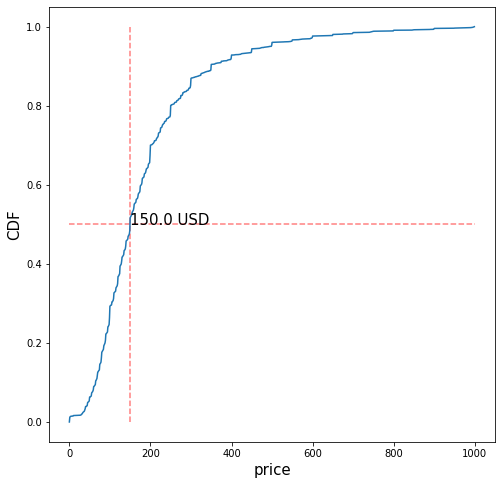

In [12]:
# Calculating the cumulative frequency of 'price' and plotting
cdf = Cdf.from_seq(df['price'])
cdf.plot(figsize=(8,8))
plt.hlines(xmin=0, xmax=1001, y=0.5, linestyles='--', color='red', alpha=0.5)
plt.vlines(ymin=0, ymax=1, x=cdf.inverse(0.5), linestyles='--', color='red', alpha=0.5)
plt.text(s=f'{cdf.inverse(0.5)} USD', x=cdf.inverse(0.5), y=0.5, fontsize=15)
plt.xlabel("price", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.show()

From the cummulative distribution frequency (CDF) curve, it shows that half of the outlet renting out price per night are less than 150 USD

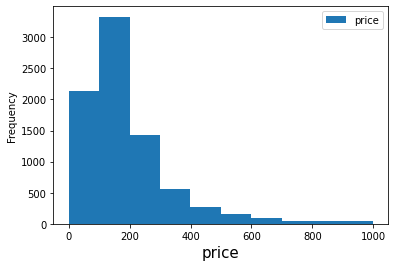

In [13]:
# Checking the distribution and skewness of the target varaible using histogram
df[['price']].plot(kind='hist')
plt.xlabel("price", fontsize=15);

This confirm our observation in the CDF and the reason why our dataset is skewed to the right, having bulk of the property been rented out for lower cost

##### 4.2. Checking the distribution of each numerical predictors in the dataset

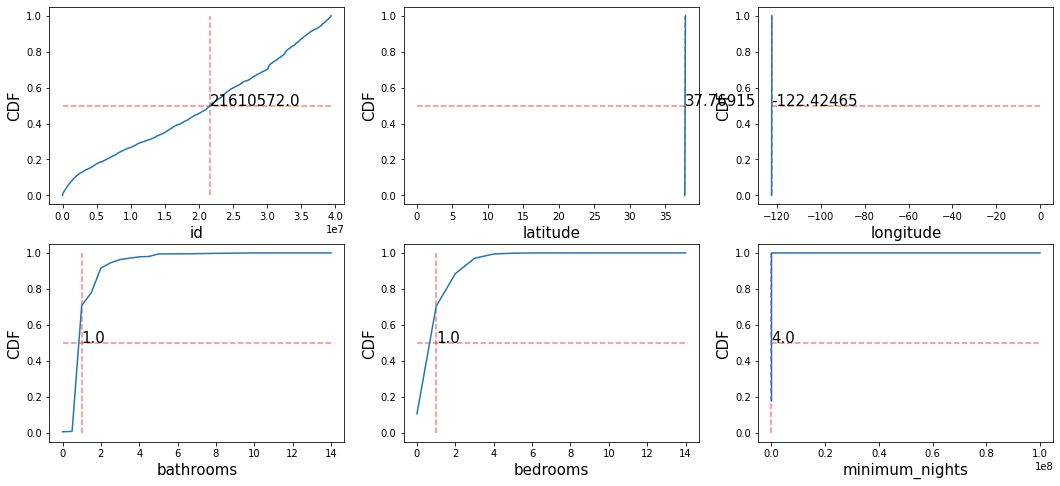

In [14]:
figsize, ax = plt.subplots(2,3, figsize=(18,8))
ax=ax.ravel() # flatten the array to allow iteration
for index, column in enumerate(numerics_list[:-1]):
    cdf = Cdf.from_seq(df[column])
    cdf.plot(ax=ax[index])
    ax[index].hlines(xmin=0, xmax=df[column].max(), y=0.5, linestyles='--', color='red', alpha=0.5)
    ax[index].vlines(ymin=0, ymax=1, x=cdf.inverse(0.5), linestyles='--', color='red', alpha=0.5)
    ax[index].text(s=cdf.inverse(0.5), x=cdf.inverse(0.5), y=0.5, fontsize=15)
    ax[index].set_xlabel(f"{column}", fontsize=15)
    ax[index].set_ylabel("CDF", fontsize=15)
plt.show()

* `id` is not an informative features at least not in this project
* `Latitude and Longitude` with the straight line instead of a `curve`, further confirm that there is little or no variation across board
* `bathrooms, bedrooms, and minimum_nights` features have variation but with most of the data skewed to the `right` and upto 70% of this property have `1 bathroom`
    - In the case of `minimum nights` the distribution is not accurately shown since it contains `outlier`

Dealing with the outlier in `minimum_nights` just to be sure of the distribution shown

In [15]:
# Checking unique values in the 'minimum_nights' and picking out the outliers
df.minimum_nights.value_counts().sort_index(ascending=False).head(10)

100000000     1
1125          1
1000          1
365           9
360           3
200           1
188           1
183           3
180          18
150           1
Name: minimum_nights, dtype: int64

It seems we only have three entry contributing (massively) as the outlier, having the value `1000 upward`
- Though some one can decide to rent out is `living space` for `1000 usd`, since it they have frequency of `one`. It may have drastic effect on our data exploration and insight that would be inferred

In [16]:
# Dropping the rows having the outlier highlighted above
df.drop(df.loc[df['minimum_nights']>=1000].index, axis=0, inplace=True)

To confirm the this `skewed assumption`, we will plot the histogram for the three features highlighted above

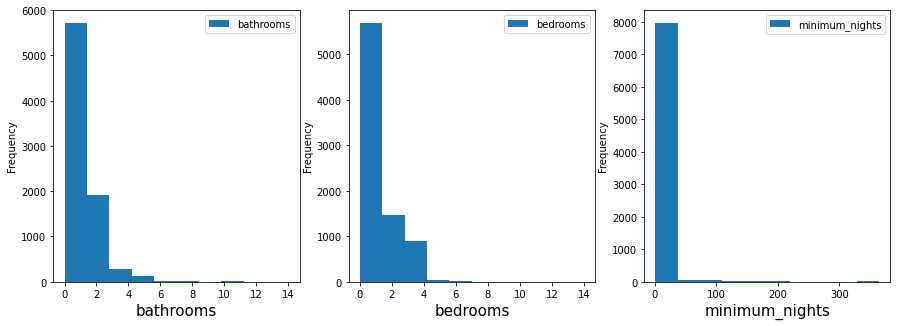

In [17]:
# Confirming the distribution and skewness of the bathrooms, bedrooms, and minimum_nights varaible using histogram
figsize, ax = plt.subplots(1,3, figsize=(15,5))
for index, column in enumerate(['bathrooms', 'bedrooms', 'minimum_nights']):
    df[[column]].dropna().plot(kind='hist', ax=ax[index])
    ax[index].set_xlabel(column, fontsize=15);

The skeweness shows that we have bulk of the `living space` have small numbers of `bathrooms, bedrooms and minimum nights`

##### 4.3. Checking the distribution of each non-numerical predictors in the dataset

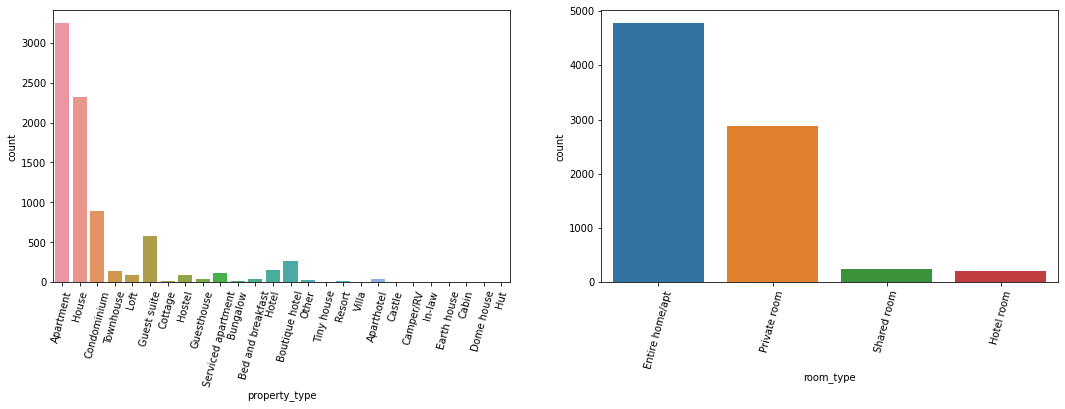

In [18]:
# Confirming the distribution and skewness of the bathrooms, bedrooms, and minimum_nights varaible using histogram
figsize, ax = plt.subplots(1,2, figsize=(18,5))
for index, column in enumerate(object_list):
    sns.countplot(x=column,  data=df, ax=ax[index])
    ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=75)

* There are more `Apartment type` than any other property type in the dataset<br><br>
* There are also more `Entire home/apt type` than any other room type<br><br>
This suggest most people renting out this variant of spaces more often or more willingly

##### 4.4. Checking relationship of `non-numerical` with the `target variable`

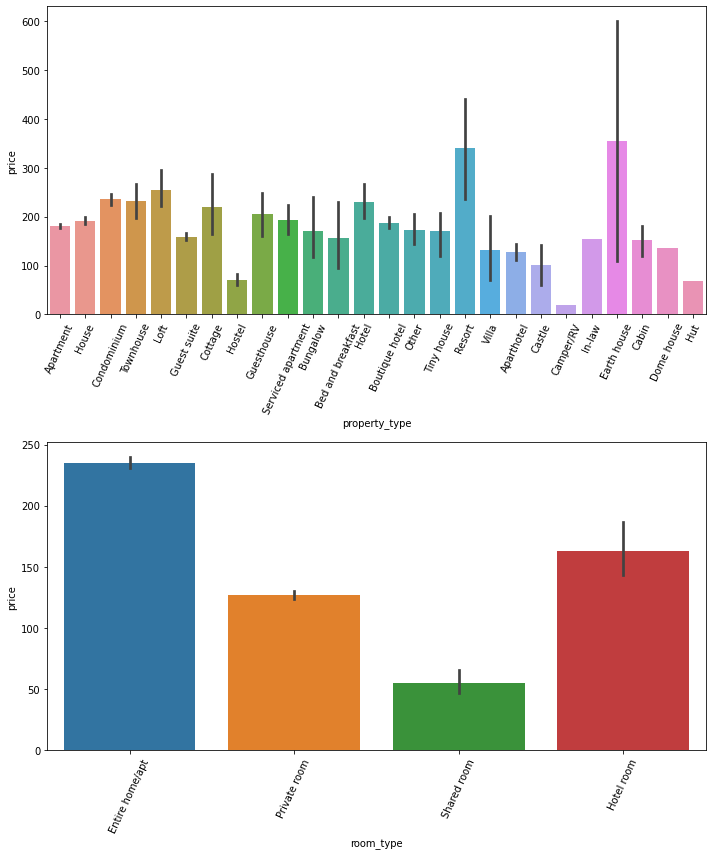

In [19]:
# Ploting a barchart
fig, ax = plt.subplots(2, 1, figsize=(10,12))
ax = ax.ravel()
for index, column in enumerate(object_list):
    sns.barplot(x=df[column], y=df['price'], ax=ax[index])
    ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=65)
fig.tight_layout();

* `Earth house` are more costlier than any other property type and same goes for `Entire home/apt` room types
    - This shows that `Entire home/apt` are often rent out and are also the costlest of the type of spaces

##### 4.5. Checking relationship of `non-numerical` features with the `bedroom and bathroom`

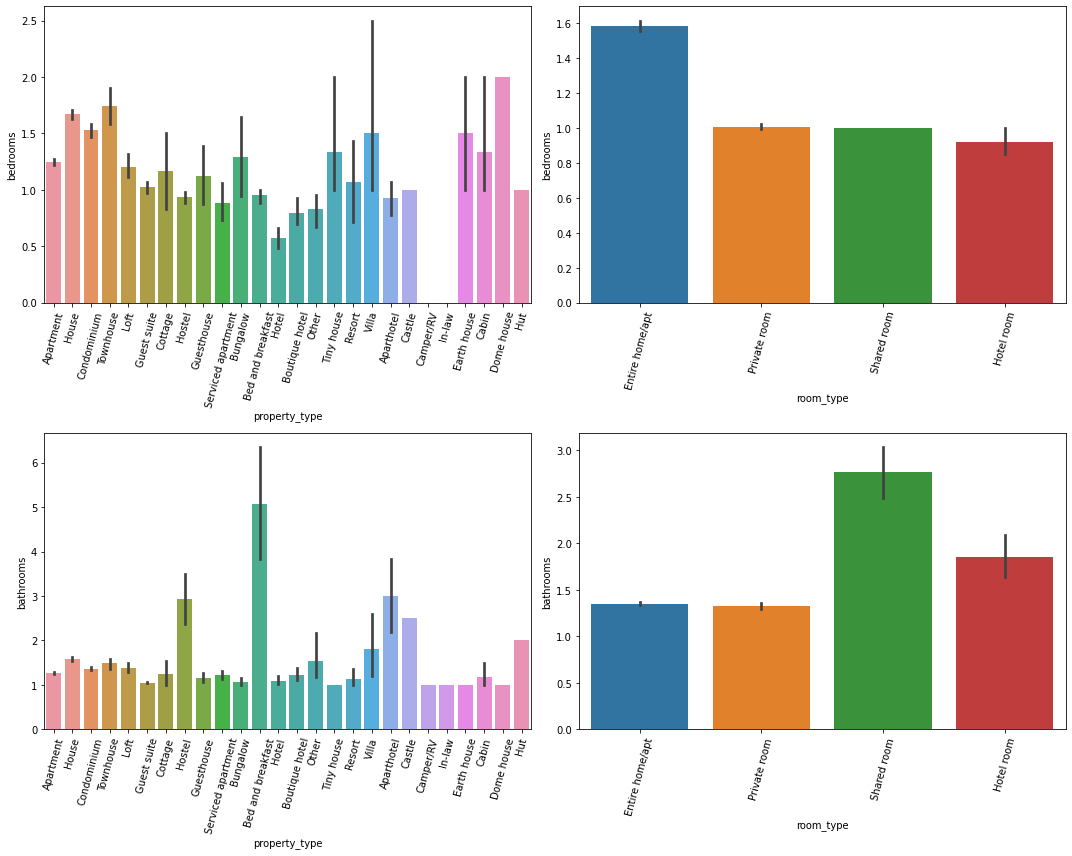

In [20]:
# Ploting a barchart
fig, ax = plt.subplots(2, 2, figsize=(15,12))
# ax = ax.ravel()
for index, column in enumerate(['bedrooms', 'bathrooms']):
    sns.barplot(x=df['property_type'], y=df[column], ax=ax[index, 0])
    sns.barplot(x=df['room_type'], y=df[column], ax=ax[index, 1])
    ax[index, 0].set_xticklabels(ax[index, 0].get_xticklabels(), rotation=75)
    ax[index, 1].set_xticklabels(ax[index, 1].get_xticklabels(), rotation=75)
fig.tight_layout();

* `Dome house` `type of property` standout having more `bedroom` and `Entire home/apt type of room` standout as having more `bedrooms`<br><br>

* `Bed and Breakfast type of property` and `shared room type of room` stand out having more `bathrooms`

##### 4.6. Checking relationship of selected `numerical` features with the target variable `price`

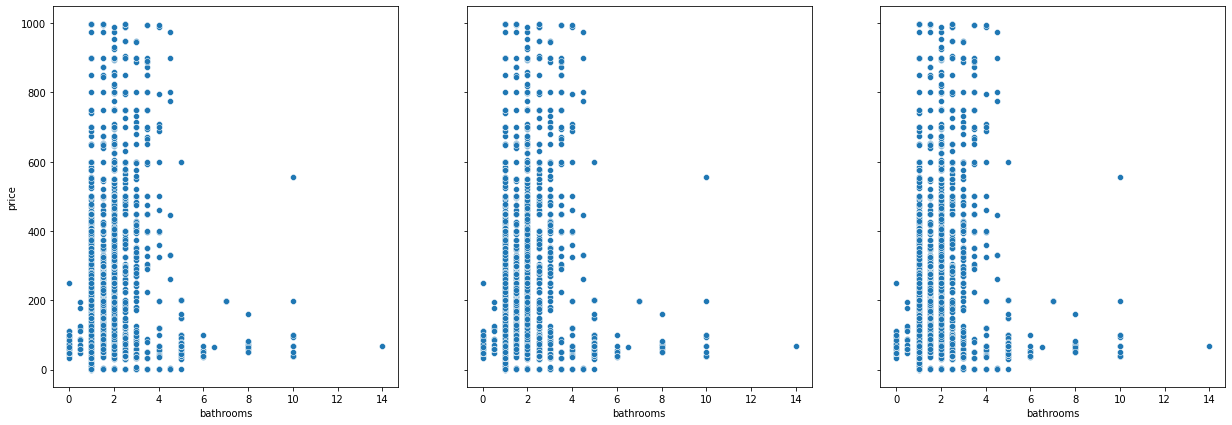

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (21, 7), sharey=True)
for index, column in enumerate(['bedrooms', 'bathrooms', 'minimum_nights']):
    sns.scatterplot(y='price', x='bathrooms', data=df, ax=ax[index])

The scatter plot for the selected/interesting numerical features shows no form of linearity
- We will further check if the numerical features have `linearity` with each other by plot an heat map correlation of all numeric datatypes

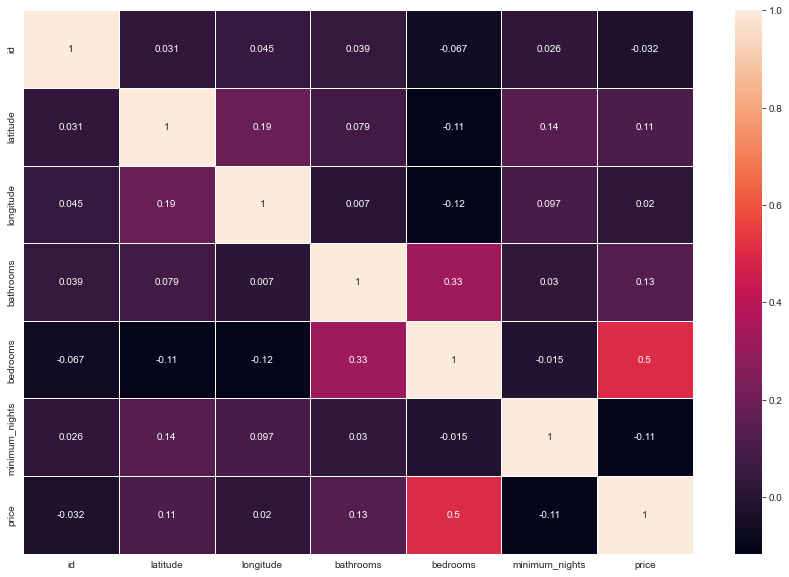

In [22]:
# correlation heatmap
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot(111);
sns.heatmap(df.corr(), annot=True, linewidths=.5)
plt.savefig('corr.png', bbox_inches='tight');

- The most correlated are `bedrooms and bathrooms` and are only correlated with our target varaible `price` and have fair not too strong relationship<br><br>
- Though there is no multicolinearity, we also don't have more predictor correlated with our target variable, which could have been a good thing

##### 4.7. Checking for outliers

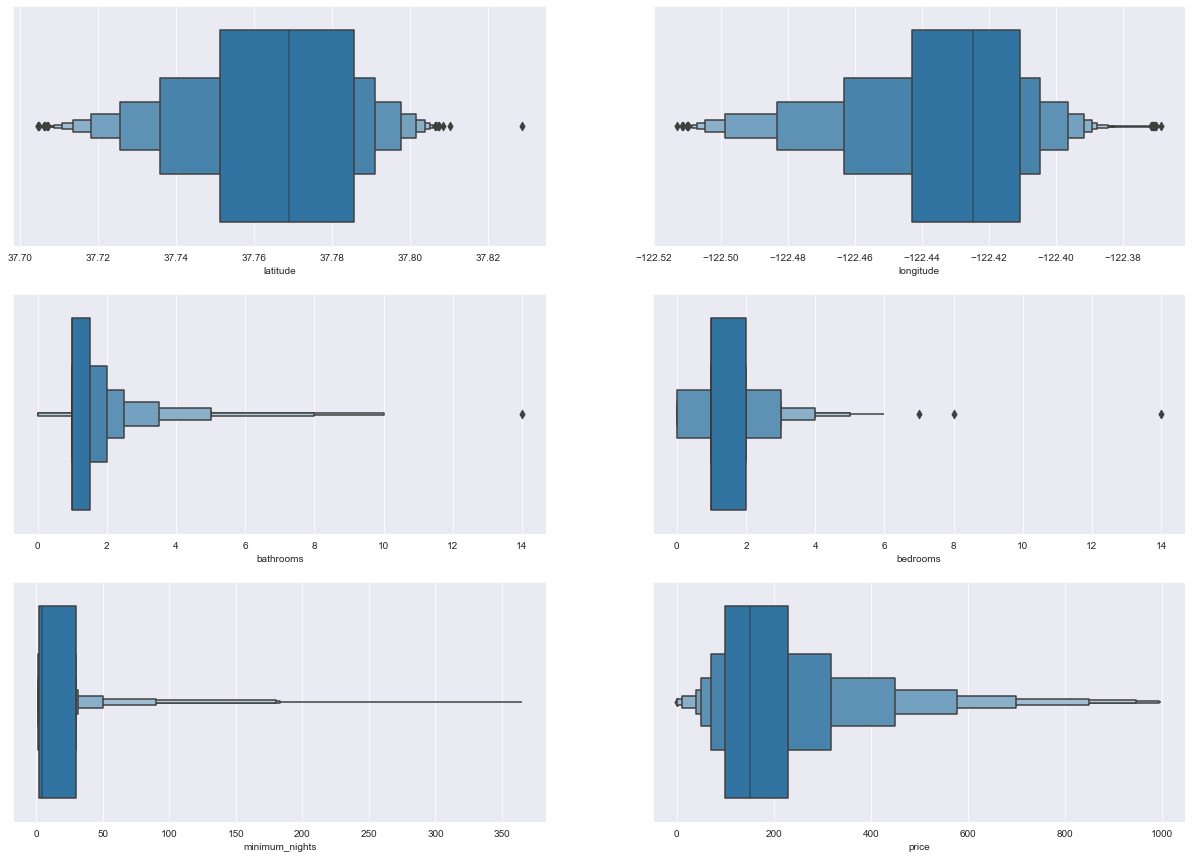

In [23]:
# Using visual to check for outliers
fig, ax = plt.subplots(3,2, figsize=(21,15))
ax=ax.ravel()
for index, coln in enumerate(numerics_list[1:]):
    sns.boxenplot(x=coln, data=df, ax=ax[index])
plt.savefig('boxplot.png', bbox_inches='tight')

* `Bathrooms and bedrooms` have outlier that can have impact on our dataset, which we will deal with in the <a href=#five>Engineering Features</a> section

<a id="five"></a>
## 5. Engineering Features
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

##### 5.1. Dealing with null values

In [24]:
df.isnull().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         12
bedrooms           4
minimum_nights     0
price              0
dtype: int64

we have null value present in `bathrooms and bedrooms`<br><br>

In [25]:
#checking for the mean median and mode of the variable
stat_bed = [round(np.mean(df.bedrooms),2), df.bedrooms.mode()[0], df.bedrooms.median()]
stat_bath = [round(np.mean(df.bathrooms),2), df.bathrooms.mode()[0], df.bathrooms.median()]
print(f'Bedrooms stat. > Mean: {stat_bed[0]}, Mode: {stat_bed[1]}, Median: {stat_bed[2]}')
print(f'Bathrooms stat. > Mean: {stat_bath[0]}, Mode: {stat_bath[1]}, Median: {stat_bath[2]}')


Bedrooms stat. > Mean: 1.35, Mode: 1.0, Median: 1.0
Bathrooms stat. > Mean: 1.4, Mode: 1.0, Median: 1.0


It is intiutive and logical to fill missing value for both affect columns with one (1)

In [26]:
# Replacing the value with the value of one (1)
df['bathrooms'] = df['bathrooms'].fillna(1.00).astype('int64')
df['bedrooms'] = df['bedrooms'].fillna(1.00).astype('int64')


##### 5.2. Dealing with outliers

From the visual in on outliers we can gather that outliers are present in;
- Bedrooms: which are values from 6 upward and<br><br> 
- Bathrooms: which only includes value `14`<br><br>
we will filter our dataset to check those entries that meet this conditions

In [27]:
# Filtering the 'bedrooms' column to see affected rows/entries
df.loc[df['bedrooms']>=6]

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
1909,8119395,37.79,-122.44,House,Entire home/apt,4,6,2,2
2021,8864274,37.79,-122.44,House,Entire home/apt,4,6,4,1
2210,10369097,37.77,-122.44,House,Entire home/apt,3,6,1,888
2386,11442093,37.78,-122.42,Boutique hotel,Private room,14,14,7,69
2502,12607119,37.80,-122.44,House,Entire home/apt,4,7,2,1
2758,14453697,37.71,-122.46,Townhouse,Entire home/apt,4,6,2,689
3444,18504951,37.76,-122.43,House,Entire home/apt,2,6,2,1
4262,22508553,37.76,-122.44,Serviced apartment,Entire home/apt,4,6,90,460
4276,22555972,37.78,-122.44,House,Entire home/apt,4,8,3,1
4789,24650875,37.78,-122.44,Condominium,Entire home/apt,3,6,2,1


By intuition we are going to remove all `bedrooms` with the value of `6 upward` and this will remove the `bathrooms` outlier too and though this might hae impact on our model it will be minimal compare to the effect outlier could have.

In [28]:
# Dropping the single row have the outlier highlighted above
df.drop(df.loc[df['bedrooms']>=6].index, axis=0, inplace=True)

##### 5.3. Categorical data encoding

In [29]:
# encoding our categorical data to esstentially turn them into nuerical datatype
df_encoded=pd.get_dummies(data=df, drop_first=True)

# re-ordering the columns to have our target variable as the last column
column_titles = [col for col in df_encoded.columns if col!= 'price'] + ['price']
df_encoded=df_encoded.reindex(columns=column_titles)

df_encoded.head()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,...,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room,price
0,958,37.77,-122.43,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,170
1,3850,37.75,-122.46,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,99
2,5858,37.75,-122.42,1,2,30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,235
3,7918,37.77,-122.45,4,1,32,1,0,0,0,...,0,0,0,0,0,0,0,1,0,65
4,8142,37.76,-122.45,4,1,32,1,0,0,0,...,0,0,0,0,0,0,0,1,0,65


In [30]:

# dropping id since it just an indentification feature which does not have impact on `price`
df_encoded = df_encoded.drop('id', axis=1)


##### 5.4. Variable Selection by Correlation and Significance

We now have 33 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between the `price` and each variables in our DataFrame and select those with the strongest correlations (both positive and negative).

We also need to consider how significant those features are. 

The code below will create a new DataFrame and store the correlation coefficents and p-values in that DataFrame for reference.

In [31]:
# Calculate correlations between predictor variables and the response variable
corrs = df_encoded.corr()['price'].sort_values(ascending=False)
corrs

price                               1.00
bedrooms                            0.52
bathrooms                           0.11
property_type_Condominium           0.11
latitude                            0.11
property_type_Loft                  0.05
property_type_Resort                0.04
property_type_Hotel                 0.04
property_type_Townhouse             0.04
longitude                           0.02
property_type_Earth house           0.02
property_type_Cottage               0.01
property_type_House                 0.01
property_type_Guesthouse            0.01
property_type_Serviced apartment    0.00
property_type_Boutique hotel       -0.00
property_type_Tiny house           -0.00
property_type_In-law               -0.00
property_type_Dome house           -0.00
property_type_Cabin                -0.01
property_type_Other                -0.01
property_type_Bungalow             -0.01
property_type_Hut                  -0.01
property_type_Villa                -0.01
property_type_Ca

In [32]:
# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'price']
for col in column_titles:
    p_val = round(pearsonr(df_encoded[col], df_encoded['price'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
bedrooms,0.52,0.00
minimum_nights,-0.11,0.00
property_type_Hostel,-0.09,0.00
property_type_Guest suite,-0.06,0.00
room_type_Shared room,-0.16,0.00
room_type_Private room,-0.32,0.00
latitude,0.11,0.00
property_type_Condominium,0.11,0.00
bathrooms,0.11,0.00
property_type_Apartment,-0.05,0.00


Now, we've got a sorted list of the p-values and correlation coefficients for each of the features, when considered on their own.  

If we were to use a logic test with a significance value of 5% (p-value < 0.05), we could only remove longitude, and so we can infer that other column are relatively statistically significant and since we don't have any multicolinearity we are going to just drop `longitude` feature 

In [33]:
# dropping 'longitude' features
df_encoded = df_encoded.drop('longitude', axis=1)
print(f'We are now left with {len(df_encoded.columns)-1} predictors')

We are now left with 32 predictors


##### 5.5. Scaling predictors with Scikit Learn

In [177]:
# Separating into predictors and target variable
y = df_encoded[['price']]
X = df_encoded.drop('price', axis=1)

In [178]:
# Spliting the new modifed dataset again to feed our model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=42)

In [179]:
# Normalize data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_normalize = pd.DataFrame(X_scaled, columns=X.columns)
X_normalize.head()

,latitude,bathrooms,bedrooms,minimum_nights,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,...,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Villa,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,0.66,0.10,0.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.54,0.10,0.80,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,0.37,0.20,0.60,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.41,0.10,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.06,0.10,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Modelling Selected Regression to see which is best Suited for our Case study task

##### 6.1. Regress all model

In [37]:
#  Creating a list of the regressor
names = ['KNeighborsRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor',
         'ExtraTreesRegressor', 'RandomForestRegressor', 'DecisionTreeRegressor',
         'LinearRegression', 'Lasso', 'Ridge']

In [38]:
# instantiate of the various regressor
Regressor = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [180]:
results = []
models = {}

for name, clf in zip(names, Regressor):    
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    mae  = metrics.mean_absolute_error(y_train, y_pred)
    mse = metrics.mean_squared_error(y_train, y_pred)
    r2_train = metrics.r2_score(y_train, y_pred)    
    r2_test = metrics.r2_score(y_test, y_pred_test)    
    
    # Save the results to dictionaries
    models[name] = clf    
    
    results.append([name, mae, mse, r2_train, r2_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Regressor', 'MAE', 'MSE', 'R2_train', 'R2_test', 'Train Time'])
results.set_index('Regressor', inplace= True)

print ('... All done!')

Fitting KNeighborsRegressor model...
... predicting
... scoring
Fitting GradientBoostingRegressor model...
... predicting
... scoring
Fitting KNeighborsRegressor model...
... predicting
... scoring
Fitting ExtraTreesRegressor model...
... predicting
... scoring
Fitting RandomForestRegressor model...
... predicting
... scoring
Fitting DecisionTreeRegressor model...
... predicting
... scoring
Fitting LinearRegression model...
... predicting
... scoring
Fitting Lasso model...
... predicting
... scoring
Fitting Ridge model...
... predicting
... scoring
... All done!


In [40]:
results.sort_values('R2_test', ascending=True)

,MAE,MSE,R2_train,R2_test,Train Time
Regressor,,,,,
DecisionTreeRegressor,0.57,31.70,1.00,0.08,0.03
ExtraTreesRegressor,0.61,31.96,1.00,0.21,1.53
KNeighborsRegressor,53.89,8781.98,0.59,0.35,0.00
KNeighborsRegressor,53.89,8781.98,0.59,0.35,0.00
Lasso,74.00,13656.32,0.36,0.37,0.01
RandomForestRegressor,24.35,1835.70,0.91,0.38,1.62
Ridge,70.63,12940.33,0.40,0.41,0.00
LinearRegression,70.62,12937.90,0.40,0.41,0.01
GradientBoostingRegressor,61.41,10219.17,0.52,0.49,0.57


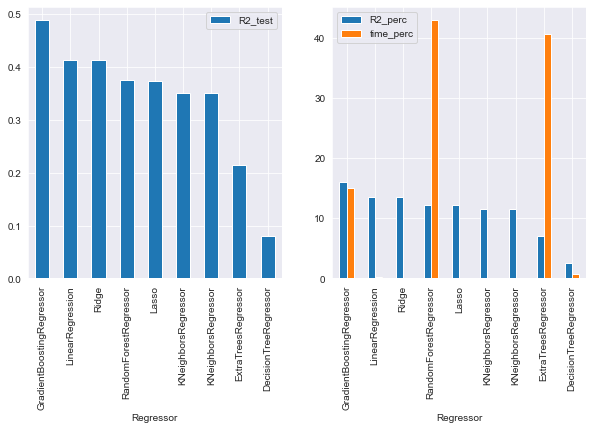

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('R2_test', ascending=False, inplace=True)
results['R2_perc'] = results['R2_test']/sum(results['R2_test'])*100
results['time_perc'] = results['Train Time']/sum(results['Train Time'])*100
results.plot(y=['R2_test'], kind='bar', ax=ax[0])
results.plot(y=['R2_perc', 'time_perc'], kind='bar', ax=ax[1])
plt.show()

`GradientBoostingRegressor` out performed other models, `Ridge and LinearRegression` also perform well, since they very light and take less time, we are going to tunning one Ridge model and compare with the ensembling method to see which actually perform better.

##### 6.2. Hyperparameter tunning with GridSearchCV

GradientBoostingRegressor tunning

In [42]:
# Creating a parameters for our gridserachCV
parameters = { 'loss' : ['ls', 'lad'],
              'learning_rate' : (0.25, 0.5),
              'criterion' : ['friedman_mse', 'mse'],
              'max_features' : ['sqrt']
             }

# running the gridsearch and fitting a model
grid_xgboost = GridSearchCV(GradientBoostingRegressor(), parameters, cv=3, n_jobs=-1)
grid_xgboost.fit(X_train, y_train) 
  
# summarize result
print('Best Score: %s' % grid_xgboost.best_score_)
print('Best Hyperparameters: %s' % grid_xgboost.best_estimator_)

Best Score: 0.4560193253881029
Best Hyperparameters: GradientBoostingRegressor(criterion='mse', learning_rate=0.25, loss='ls',
                          max_features='sqrt')


Ridge tunning

In [43]:
# cross validation parameter
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Creating a parameters for our gridserachCV
param = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False],
    'normalize':[True, False]
}

# define and excute search 
grid_ridge = GridSearchCV(Ridge(), param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
grid_ridge.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % grid_ridge.best_score_)
print('Best Hyperparameters: %s' % grid_ridge.best_estimator_)

Best Score: -71.04188230471487
Best Hyperparameters: Ridge(alpha=1, normalize=False, solver='lsqr')


<a id="seven"></a>
## 7. Model Evaluation & Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

modelling with the best parameter result from the grid search

In [72]:
# define model with the best estimators
ridge = Ridge(alpha=1, normalize=False, solver='lsqr')
xgboost = GradientBoostingRegressor(learning_rate=0.25, loss='ls', max_features='sqrt', random_state=42)

model_dict = {"Ridge":ridge, "XGboost":xgboost}
metric_list = []

for name, model in model_dict.items():
    model.fit(X_train, y_train)
    predicts_train = model.predict(X_train)
    predicts_test = model.predict(X_test)

    # metrics calculation
    mae_train = metrics.mean_absolute_error(y_train, predicts_train)
    mae_test = metrics.mean_absolute_error(y_test, predicts_test)
    r2_train = metrics.r2_score(y_train, predicts_train)
    r2_test = metrics.r2_score(y_test, predicts_test)
    metric_list.append([name, mae_train, mae_test, r2_train, r2_test])
    # Saving the trained model as a pickle file
    Pkl_Filename = f"{name}_model.pkl"  

    with open(Pkl_Filename, 'wb') as file:  
        pickle.dump(model, file)
    
model_df = pd.DataFrame(metric_list, columns=['Regressor', 'MAE_train', 'MAE_test', 'R2_train', 'R2_test'])
model_df.set_index('Regressor', inplace= True)
model_df

,MAE_train,MAE_test,R2_train,R2_test
Regressor,,,,
Ridge,70.63,68.74,0.40,0.41
XGboost,61.45,63.85,0.53,0.48


`XGboost` was overfitting and though perform better on unseen data, the performance may degrade with more unseen data, whereas `Ridge` can rather improve it performance with more unseen data

In [ ]:
predicts = ridge.predict(X_test)
dict_df = {"Actual":y_test.price, "Predicted":predicts_test.ravel()}
cal_ = pd.DataFrame(dict_df)
cal_["diff"] = cal_["Actual"] - cal_["Predicted"]
cal_["count"] = cal_["diff"].apply(lambda x: 'better prediction' if x < 25 else 'over estimated')

In [ ]:
cal_['count'].value_counts(normalize=True).plot(kind='bar');

Going by the instruction for the task we were able to achieve 73% accuracy. I.e. for price estimation that did pass the threshold of `25 USD off the actual price`

<a id="eight"></a>
## 8. Future works
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The work is far from over since our accuracy seem relatively not sufficent, there are still other data anaylsis tools, resources and more importantly improving our dataset, this are but few of the highlighted options for future improvement on the project
* Latitude and Logitude does not well represent the location of a `living space`;
    - Having precise location name
    - Location attribute as features could give more data pattern<br><br>
* `cleaner data` for attribute of a `living space`, for example we can't have a room of 1.5, it either 1 or 2 rooms by norm<br><br>
* We can use this basic model to set standard range for renting price, In such away that the owner can still have choice inputting a price on his/her living space but within a certain threshold
    - The insight from the EDA can guide in setting those threshold<br><br>
* History or interesting information about the property or it community can be gather too.
* Engineering new features and see evaluation how best they server our model<br><br>
* Use more computing intensive and rigorous machine learning model, such as `nueral network`<br><br>
Generally the model would do better with more data and features, gathering all related data to properties and experimenting the ones that best inform our modelling.

<a id="nine"></a>
## 9. Outcome & Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

* In this project we have explore how each attribute or feature of a property affect pricing and the type of properties that are often be rent out<br><br>
* We also see the most useful of this feature to predict or estimate price of renting out per night.<br><br>
* Different Regressor was use where three of them performed better but two were choosen because two (LinearRegression and Rigde) had the same performance<br><br>
* After `hyperparameter tunning` and `k-fold cross-validation` using `GridSearchCV` we were able to achieve a relative acurracy of 73% base of task guided instruction
    - we discovered that `XGboost` was overfitting and had better better performance than `Ridge` model but in the end the result were so close it was both 73% on approximation<br><br>

<a id="ten"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


* I got some idea from [Stack-Over-Flow](https://stackoverflow.com) especially for the GridsearchCV
* Scikit-learn documentation from there webpage [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
* [K Folds Cross validation Tutorial from Analytics Vidhya](https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/)
* [sklearn tutorial on visualisation](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
* [Feature selection with real and categorical data](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)